In [1]:
import numpy as np
import matplotlib.pyplot as plt
from derivatives import vacuum, cross_product

In [2]:
data = np.load("T100TTFT.npz", allow_pickle=True)
print(data.files)

['settings', 'raw', 'prob']


In [3]:
settings = data['settings'].item()

In [4]:
e_max = settings['eps_max']
N = settings['N'] + 1
p = np.linspace(0, e_max, N)
E = p * settings['T']

In [5]:
raw = data['raw'].item()

In [6]:
nu3D = raw['nu3D']
nubar3D = raw['nubar3D']

In [7]:
def dnue_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1+Pz)
def dnumu_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1-Pz)

In [8]:
def plot_dnue_dE(data, t, bar):
    x = E[1:]
    y = np.zeros(len(x))
    for i in range(len(y)):
        y[i] = dnue_dE(x[i], data[t][i][0], data[t][i][3])
        
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('Energy')
    if bar == False:
        plt.ylabel("dnu_e/dE")
        plt.title(f"dnu_e/dE vs. Energy for t={t}")
    else:
        plt.ylabel("dnu_e bar/dE")
        plt.title(f"dnu_e bar/dE vs. Energy for t={t}")
    plt.show()

In [9]:
def plot_dnumu_dE(data, t, bar):
    x = E[1:]
    y = np.zeros(len(x))
    for i in range(len(y)):
        y[i] = dnumu_dE(x[i], data[t][i][0], data[t][i][3])
        
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('Energy')
    if bar == False:
        plt.ylabel("dnu_mu/dE")
        plt.title(f"dnu_mu/dE vs. Energy for t={t}")
    else:
        plt.ylabel("dnu_mu bar/dE")
        plt.title(f"dnu_mu bar/dE vs. Energy for t={t}")
    plt.show()

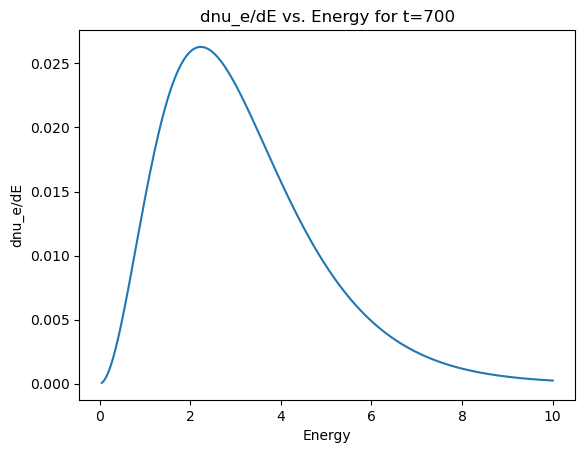

In [11]:
plot_dnue_dE(nu3D, 700, False)

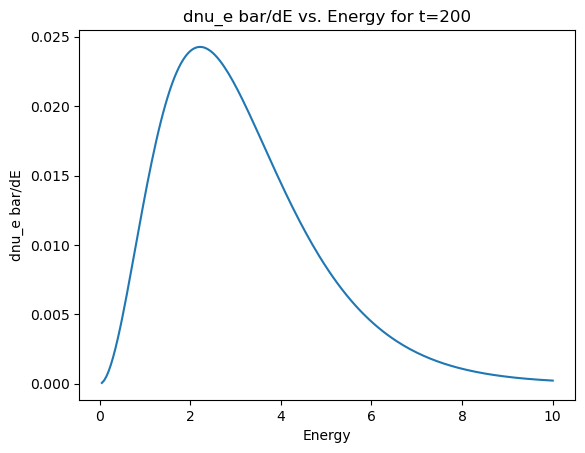

In [12]:
plot_dnue_dE(nu3D, 200, True)

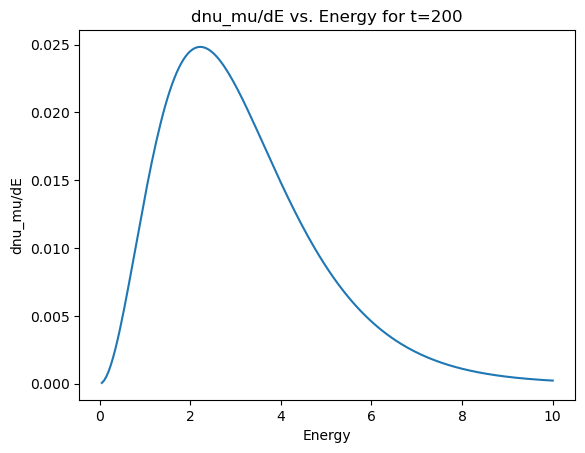

In [13]:
plot_dnumu_dE(nu3D, 200, False)

In [34]:
def color_map(c, title):
    plt.figure()
    plt.imshow(c[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=time)
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title(title)
    plt.colorbar()
    plt.show()

In [35]:
def create_c(function, data):
    c = np.zeros((len(data), len(E[1:])))
    for j in range(len(E[1:])):
        initial = function(E[j+1], data[0,j,0], data[0,j,3])
        for i in range(len(data)):
            c[i,j] = function(E[j+1], data[i,j,0], data[i,j,3]) / initial
    return c.T

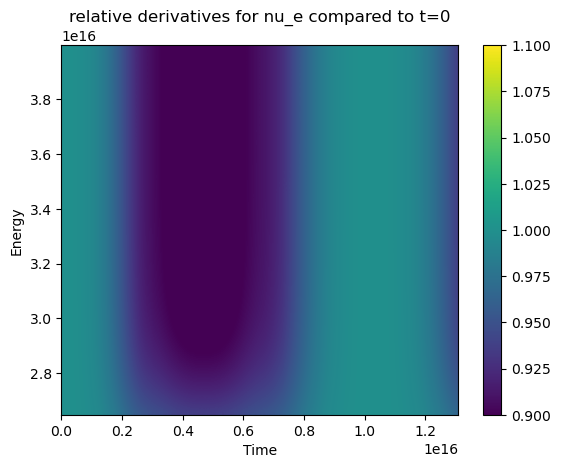

In [36]:
#color map for relative derivative value for dn_nue
c = create_c(dnue_dE, nu3D)
color_map(c, "relative derivatives for nu_e compared to t=0")

In [37]:
time = raw['time']
print(time)

[0.00000000e+00 1.30796632e+16 2.64727645e+16 3.99841722e+16
 5.33461644e+16 6.66445189e+16 7.97860671e+16 9.28625030e+16
 1.05880022e+17 1.18905030e+17 1.31977501e+17 1.45120053e+17
 1.58644267e+17 1.72425291e+17 1.86361878e+17 2.00715433e+17
 2.15194571e+17 2.29817160e+17 2.44574784e+17 2.59479791e+17
 2.74516857e+17 2.89707055e+17 3.05048721e+17 3.20533218e+17
 3.36243112e+17 3.52055050e+17 3.68070378e+17 3.84210986e+17
 4.00531050e+17 4.17042829e+17 4.33736163e+17 4.50539622e+17
 4.67613782e+17 4.84693330e+17 5.02138423e+17 5.19723192e+17
 5.37317970e+17 5.55194945e+17 5.73456565e+17 5.91757140e+17
 6.10085076e+17 6.28444299e+17 6.47396685e+17 6.66657231e+17
 6.86047401e+17 7.05498891e+17 7.24973365e+17 7.44456426e+17
 7.63965927e+17 7.83883081e+17 8.04569119e+17 8.25593902e+17
 8.46837082e+17 8.68233758e+17 8.89753065e+17 9.11366366e+17
 9.33053288e+17 9.54793193e+17 9.76573210e+17 9.98362428e+17
 1.02016678e+18 1.04198899e+18 1.06381646e+18 1.08571282e+18
 1.10795327e+18 1.131425

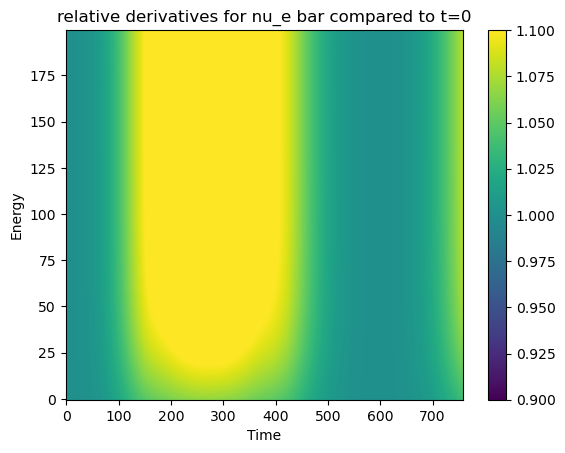

In [28]:
#color map for relative derivative value for dn_numubar
c2 = create_c(dnue_dE, nubar3D)
color_map(c2, "relative derivatives for nu_e bar compared to t=0")

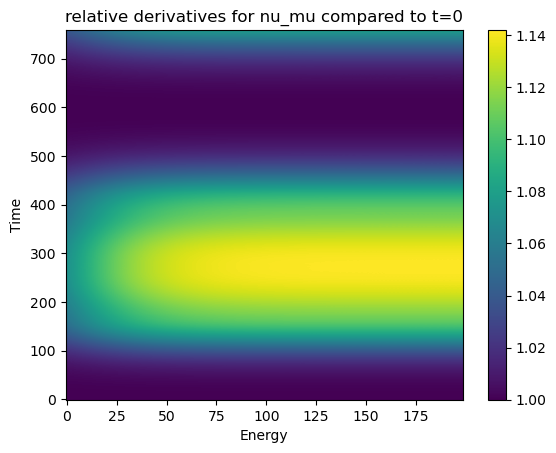

In [14]:
#color map for relative derivative value for dn_numu
c1 = create_c(dnumu_dE, nu3D)
color_map(c1, "relative derivatives for nu_mu compared to t=0")

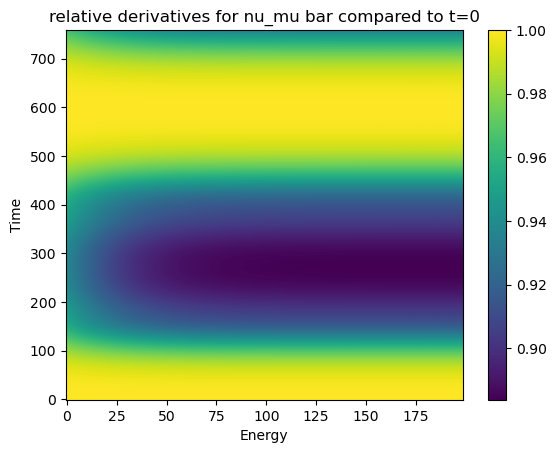

In [15]:
c4 = create_c(dnumu_dE, nubar3D)
color_map(c4, "relative derivatives for nu_mu bar compared to t=0")

In [31]:
run20data = np.load("Run20-long.npz", allow_pickle=True)
raw2 = run20data['raw'].item()
nu3D2 = raw2['nu3D']
nubar3D2 = raw2['nubar3D']

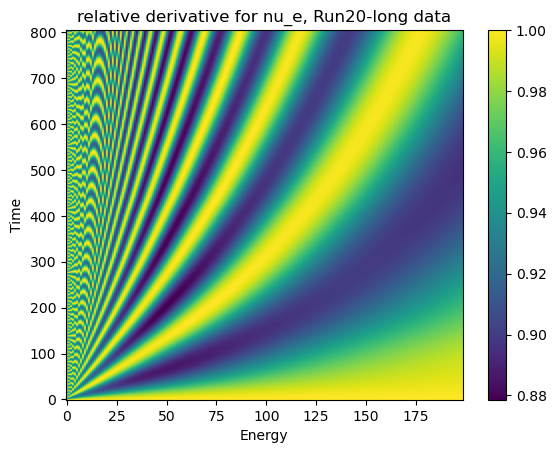

In [37]:
c5 = create_c(dnue_dE, nu3D2)
color_map(c5, "relative derivative for nu_e, Run20-long data")

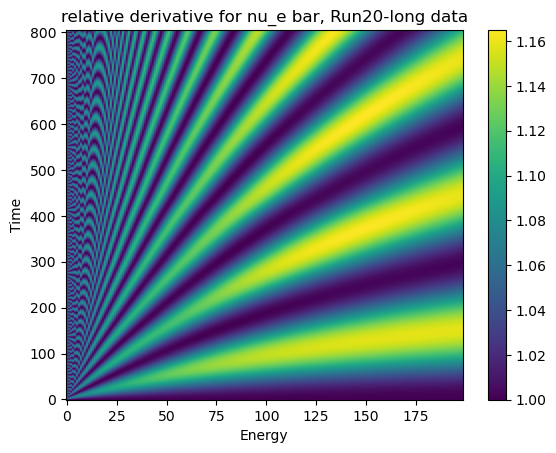

In [38]:
c6 = create_c(dnue_dE, nubar3D2)
color_map(c6, "relative derivative for nu_e bar, Run20-long data")

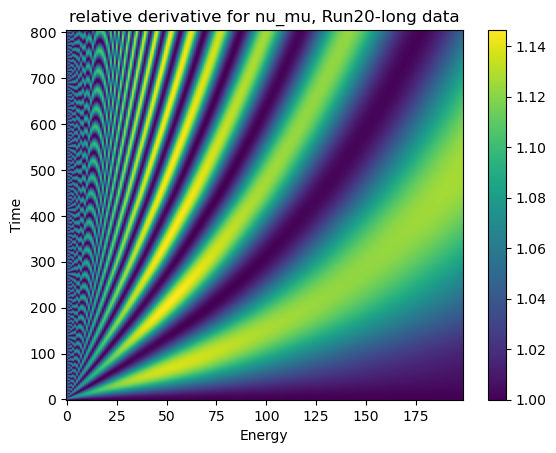

In [39]:
c7 = create_c(dnumu_dE, nu3D2)
color_map(c7, "relative derivative for nu_mu, Run20-long data")

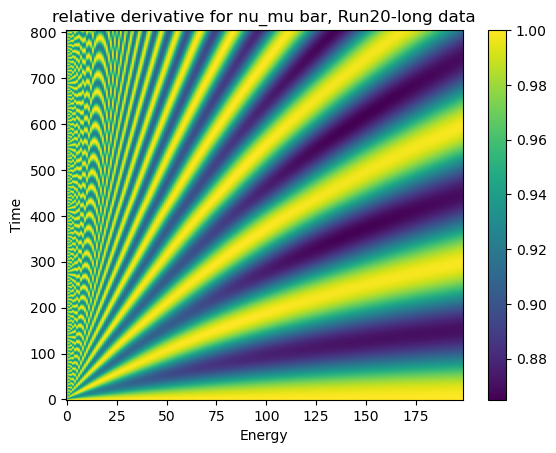

In [40]:
c5 = create_c(dnumu_dE, nubar3D2)
color_map(c5, "relative derivative for nu_mu bar, Run20-long data")